In [ ]:

















































#

In [ ]:
# Experiment 1: Basic Image Operations
import cv2
import numpy as np

img = cv2.imread("images.jpeg", 1)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

row, col, channels = img.shape
print(f"Shape: {row}x{col}, Channels: {channels}")
print(f"Data type: {img.dtype}")

# RGB Channel Splitting with Color Visualization
b, g, r = cv2.split(img)
zeros = np.zeros(img.shape[:2], dtype="uint8")

blue_colored = cv2.merge([b, zeros, zeros])
cv2.imshow("Blue Channel", blue_colored)

green_colored = cv2.merge([zeros, g, zeros])
cv2.imshow("Green Channel", green_colored)

red_colored = cv2.merge([zeros, zeros, r])
cv2.imshow("Red Channel", red_colored)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Grayscale Conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Cropping
cropped = img[50:150, 30:150]
cv2.imshow("Cropped Image", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Resizing
resized = cv2.resize(img, (300, 300))
cv2.imshow("Resized Image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Shape: 183x275, Channels: 3
Data type: uint8


In [2]:
# Experiment 2: Digital Negative, Contrast Stretching, Thresholding, Grey Level Slicing
import cv2
import numpy as np

img = cv2.imread("images.jpeg", 0)
row, col = img.shape

# Digital Negative
negative = 255 - img
cv2.imshow("Original", img)
cv2.imshow("Negative", negative)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Contrast Stretching (piecewise linear transformation)
l = 0.5  # slope for first region
m = 2.0  # slope for middle region
n = 0.5  # slope for third region
a = 70   # first threshold
b = 150  # second threshold

v = l * a
w = v + m * (b - a)

contrast_stretched = img.copy()
for i in range(row):
    for j in range(col):
        if img[i,j] <= a:
            val = int(l * img[i,j])
        elif img[i,j] <= b:
            val = int(m * (img[i,j] - a) + v)
        else:
            val = int(n * (img[i,j] - b) + w)
        contrast_stretched[i,j] = np.clip(val, 0, 255)

cv2.imshow("Original", img)
cv2.imshow("Contrast Stretched", contrast_stretched)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding
threshold_value = 128
_, thresholded = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imshow("Original", img)
cv2.imshow("Thresholded", thresholded)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Grey Level Slicing
A = 100  # lower bound
B = 180  # upper bound
sliced = img.copy()

for i in range(row):
    for j in range(col):
        if A <= img[i,j] <= B:
            sliced[i,j] = 255
        else:
            sliced[i,j] = 0

cv2.imshow("Original", img)
cv2.imshow("Grey Level Sliced", sliced)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# Experiment 3: Log and Power Law Transformation
import cv2
import numpy as np
import math

img = cv2.imread("images.jpeg", 0)
row, col = img.shape

# Log Transformation (Dynamic Range Compression)
c = 40  # normalization constant
log_img = img.copy().astype(np.float32)
log_img = c * np.log2(1 + log_img)
log_img = np.clip(log_img, 0, 255).astype(np.uint8)

cv2.imshow("Original", img)
cv2.imshow("Log Transformation", log_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Power Law Transformation (Gamma Correction)
c = 1
gamma = 1.5

normalized = img.astype(np.float32) / 255.0
power_img = c * (normalized ** gamma)
power_img = (power_img * 255).astype(np.uint8)

cv2.imshow("Original", img)
cv2.imshow("Power Law (Gamma=" + str(gamma) + ")", power_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Alternative gamma values demonstration
gamma_values = [0.5, 1.0, 2.0]
for g in gamma_values:
    normalized = img.astype(np.float32) / 255.0
    gamma_corrected = c * (normalized ** g)
    gamma_corrected = (gamma_corrected * 255).astype(np.uint8)
    cv2.imshow(f"Gamma={g}", gamma_corrected)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Experiment 4: Gaussian and Salt & Pepper Noise
import cv2
import numpy as np

img = cv2.imread("images.jpeg", 0)
row, col = img.shape

# Gaussian Noise
def add_gaussian_noise(image, mean=0, var=100):
    sigma = var ** 0.5
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gaussian_noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

noisy_gaussian = add_gaussian_noise(img, mean=10, var=500)
cv2.imshow("Original", img)
cv2.imshow("Gaussian Noise", noisy_gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Averaging Filter
mask = np.ones([3,3]) / 9
filtered = np.zeros([row, col])

for i in range(1, row-1):
    for j in range(1, col-1):
        temp = (noisy_gaussian[i-1,j-1]*mask[0,0] + noisy_gaussian[i-1,j]*mask[0,1] + 
                noisy_gaussian[i-1,j+1]*mask[0,2] + noisy_gaussian[i,j-1]*mask[1,0] + 
                noisy_gaussian[i,j]*mask[1,1] + noisy_gaussian[i,j+1]*mask[1,2] +
                noisy_gaussian[i+1,j-1]*mask[2,0] + noisy_gaussian[i+1,j]*mask[2,1] + 
                noisy_gaussian[i+1,j+1]*mask[2,2])
        filtered[i,j] = temp

filtered = filtered.astype(np.uint8)
cv2.imshow("Filtered (Averaging)", filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salt & Pepper Noise
def add_salt_pepper(image, prob=0.05):
    noisy = image.copy()
    num_salt = int(prob * image.size * 0.5)
    num_pepper = int(prob * image.size * 0.5)
    
    coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255
    
    coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0
    
    return noisy

noisy_sp = add_salt_pepper(img, prob=0.05)
cv2.imshow("Original", img)
cv2.imshow("Salt & Pepper Noise", noisy_sp)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Median Filter
median_filtered = cv2.medianBlur(noisy_sp, 5)
cv2.imshow("Median Filtered", median_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Experiment 5: High-Pass and High-Boost Filtering
import cv2
import numpy as np

img = cv2.imread("images.jpeg", 0)
row, col = img.shape

# High-Pass Filter
hp_mask = np.array([[-1,-1,-1],
                    [-1, 8,-1],
                    [-1,-1,-1]])

hp_filtered = np.zeros([row, col])
for i in range(1, row-1):
    for j in range(1, col-1):
        temp = (img[i-1,j-1]*hp_mask[0,0] + img[i-1,j]*hp_mask[0,1] + 
                img[i-1,j+1]*hp_mask[0,2] + img[i,j-1]*hp_mask[1,0] + 
                img[i,j]*hp_mask[1,1] + img[i,j+1]*hp_mask[1,2] +
                img[i+1,j-1]*hp_mask[2,0] + img[i+1,j]*hp_mask[2,1] + 
                img[i+1,j+1]*hp_mask[2,2])
        hp_filtered[i,j] = temp

hp_filtered = np.clip(hp_filtered, 0, 255).astype(np.uint8)
cv2.imshow("Original", img)
cv2.imshow("High-Pass Filtered", hp_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# High-Boost Filter
A = 0.9
hb_mask = np.array([[-1,-1,-1],
                    [-1, 8+A,-1],
                    [-1,-1,-1]])

hb_filtered = np.zeros([row, col])
for i in range(1, row-1):
    for j in range(1, col-1):
        temp = (img[i-1,j-1]*hb_mask[0,0] + img[i-1,j]*hb_mask[0,1] + 
                img[i-1,j+1]*hb_mask[0,2] + img[i,j-1]*hb_mask[1,0] + 
                img[i,j]*hb_mask[1,1] + img[i,j+1]*hb_mask[1,2] +
                img[i+1,j-1]*hb_mask[2,0] + img[i+1,j]*hb_mask[2,1] + 
                img[i+1,j+1]*hb_mask[2,2])
        hb_filtered[i,j] = temp

hb_filtered = np.clip(hb_filtered, 0, 255).astype(np.uint8)
cv2.imshow("High-Boost Filtered", hb_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

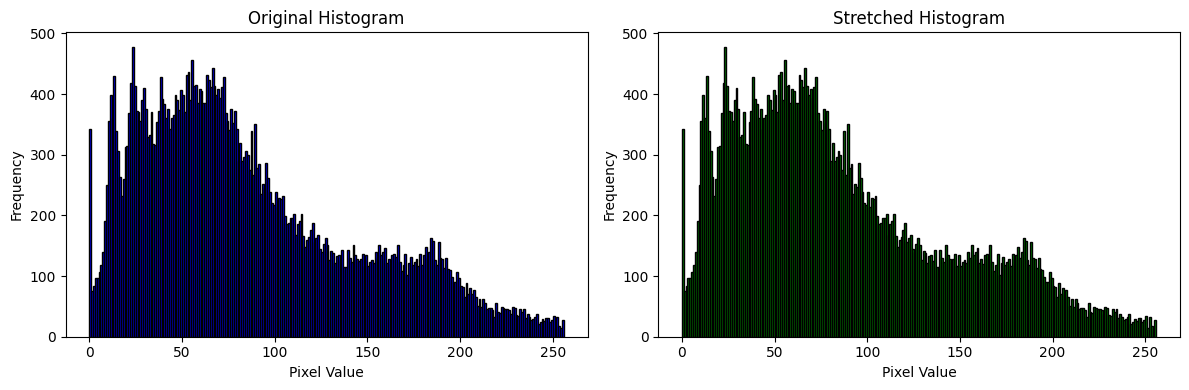

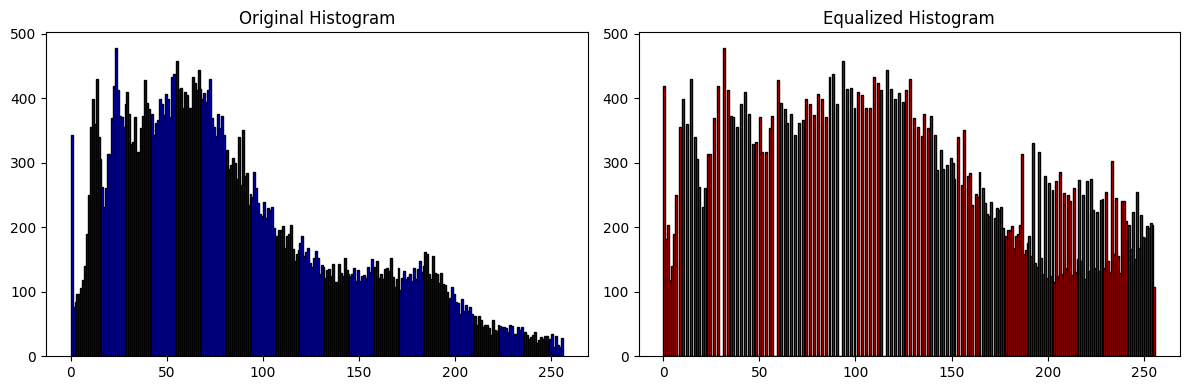

In [ ]:
# Experiment 6: Histogram Stretching and Equalization
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images.jpeg", 0)
row, col = img.shape

# Histogram Stretching
max_val = float(img.max())
min_val = float(img.min())
stretched = img.copy().astype(np.float64)

for i in range(row):
    for j in range(col):
        val = ((255.0 - 0.0) * (float(img[i,j]) - min_val) / (max_val - min_val)) + 0.0
        stretched[i,j] = np.clip(val, 0.0, 255.0)

stretched = stretched.astype(np.uint8)

cv2.imshow("Original", img)
cv2.imshow("Histogram Stretched", stretched)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(img.flatten(), bins=256, range=[0,256], color='blue', edgecolor='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(stretched.flatten(), bins=256, range=[0,256], color='green', edgecolor='black')
plt.title('Stretched Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram Equalization
equalized = cv2.equalizeHist(img)

cv2.imshow("Original", img)
cv2.imshow("Histogram Equalized", equalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(img.flatten(), bins=256, range=[0,256], color='blue', edgecolor='black')
plt.title('Original Histogram')

plt.subplot(1, 2, 2)
plt.hist(equalized.flatten(), bins=256, range=[0,256], color='red', edgecolor='black')
plt.title('Equalized Histogram')
plt.tight_layout()
plt.show()

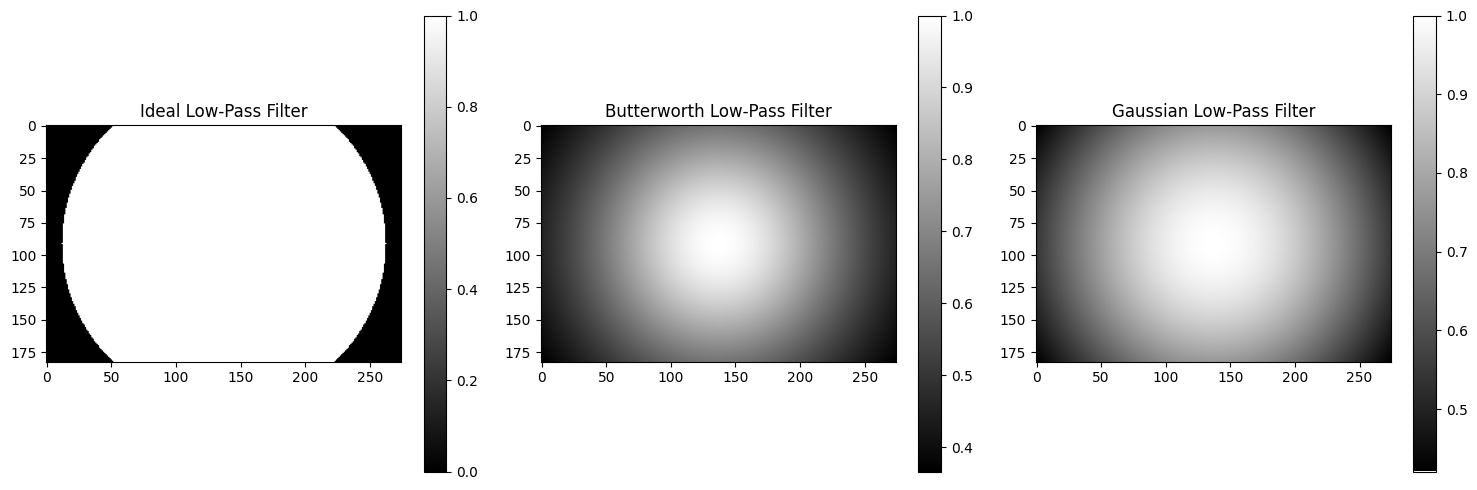

In [ ]:
# Experiment 7A: Low-Pass Filters (Ideal, Butterworth, Gaussian)
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images.jpeg", 0)
rows, cols = img.shape

x = np.arange(rows).reshape(rows, 1)
y = np.arange(cols).reshape(1, cols)
centered_img = img * ((-1) ** (x + y))

F = np.fft.fft2(centered_img)
F_shifted = np.fft.fftshift(F)

D0 = 125
u = np.arange(rows)
v = np.arange(cols)
u, v = np.meshgrid(u - rows//2, v - cols//2, indexing='ij')
D = np.sqrt(u**2 + v**2)

# Ideal Low-Pass Filter
H_ideal = np.zeros_like(D)
H_ideal[D <= D0] = 1
H_ideal[D > D0] = 0

G_ideal = F_shifted * H_ideal
g_ideal = np.fft.ifft2(np.fft.ifftshift(G_ideal))
g_ideal = np.abs(g_ideal)

# Butterworth Low-Pass Filter
n = 1
H_butterworth = 1 / (1 + (D / D0)**(2 * n))

G_butterworth = F_shifted * H_butterworth
g_butterworth = np.fft.ifft2(np.fft.ifftshift(G_butterworth))
g_butterworth = np.abs(g_butterworth)

# Gaussian Low-Pass Filter
H_gaussian = np.exp(-(D**2) / (2 * D0**2))

G_gaussian = F_shifted * H_gaussian
g_gaussian = np.fft.ifft2(np.fft.ifftshift(G_gaussian))
g_gaussian = np.abs(g_gaussian)

cv2.imshow("Original", img)
cv2.imshow("Ideal Low-Pass", g_ideal.astype(np.uint8))
cv2.imshow("Butterworth Low-Pass", g_butterworth.astype(np.uint8))
cv2.imshow("Gaussian Low-Pass", g_gaussian.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(H_ideal, cmap='gray')
plt.title("Ideal Low-Pass Filter")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(H_butterworth, cmap='gray')
plt.title("Butterworth Low-Pass Filter")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(H_gaussian, cmap='gray')
plt.title("Gaussian Low-Pass Filter")
plt.colorbar()

plt.tight_layout()
plt.show()

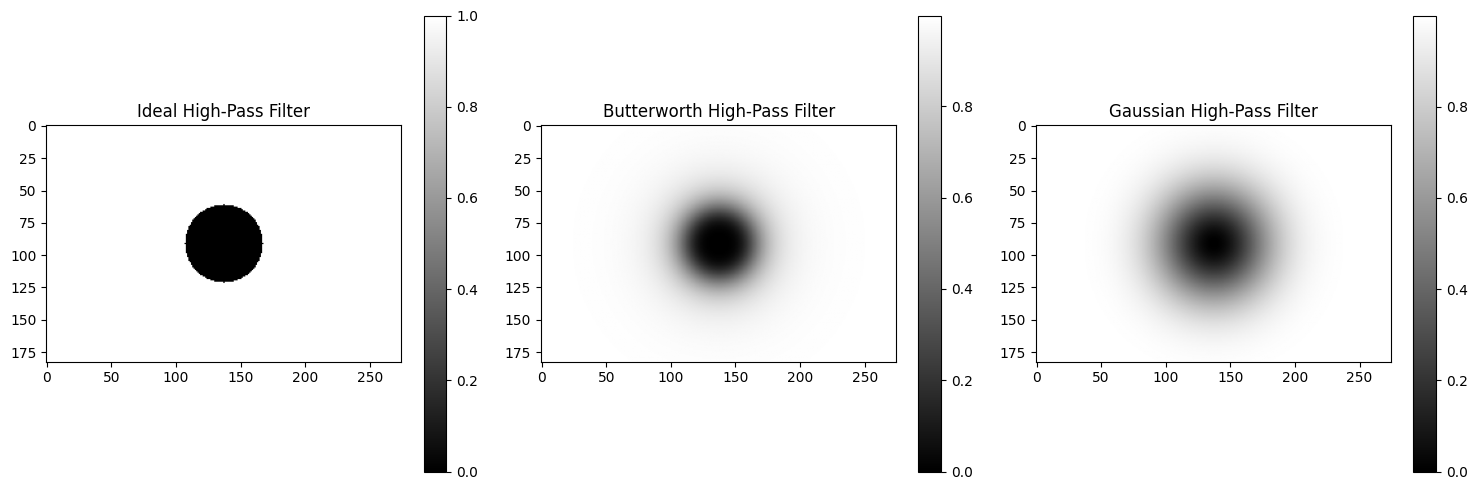

In [ ]:
# Experiment 7B: High-Pass Filters (Ideal, Butterworth, Gaussian)
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images.jpeg", 0)
rows, cols = img.shape

x = np.arange(rows).reshape(rows, 1)
y = np.arange(cols).reshape(1, cols)
centered_img = img * ((-1) ** (x + y))

F = np.fft.fft2(centered_img)
F_shifted = np.fft.fftshift(F)

D0 = 30
u, v = np.meshgrid(np.arange(rows) - rows//2, 
                   np.arange(cols) - cols//2, indexing='ij')
D = np.sqrt(u**2 + v**2)

# Ideal High-Pass Filter
H_ideal = np.zeros_like(D)
H_ideal[D <= D0] = 0
H_ideal[D > D0] = 1

G_ideal = F_shifted * H_ideal
g_ideal = np.fft.ifft2(np.fft.ifftshift(G_ideal))
g_ideal = np.abs(g_ideal)

# Butterworth High-Pass Filter
n = 2
H_butterworth = 1 / (1 + (D0 / (D + 1e-10))**(2 * n))

G_butterworth = F_shifted * H_butterworth
g_butterworth = np.fft.ifft2(np.fft.ifftshift(G_butterworth))
g_butterworth = np.abs(g_butterworth)

# Gaussian High-Pass Filter
H_gaussian = 1 - np.exp(-(D**2) / (2 * D0**2))

G_gaussian = F_shifted * H_gaussian
g_gaussian = np.fft.ifft2(np.fft.ifftshift(G_gaussian))
g_gaussian = np.abs(g_gaussian)

cv2.imshow("Original", img)
cv2.imshow("Ideal High-Pass", g_ideal.astype(np.uint8))
cv2.imshow("Butterworth High-Pass", g_butterworth.astype(np.uint8))
cv2.imshow("Gaussian High-Pass", g_gaussian.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(H_ideal, cmap='gray')
plt.title("Ideal High-Pass Filter")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(H_butterworth, cmap='gray')
plt.title("Butterworth High-Pass Filter")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(H_gaussian, cmap='gray')
plt.title("Gaussian High-Pass Filter")
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
# Experiment 8: Line Detection
import cv2
import numpy as np

img = cv2.imread("images.jpeg", 0)
row, col = img.shape

# Horizontal Line Detection
horizontal_mask = np.array([[-1,-1,-1],
                            [ 2, 2, 2],
                            [-1,-1,-1]])

horizontal_lines = np.zeros([row, col])
for i in range(1, row-1):
    for j in range(1, col-1):
        temp = (img[i-1,j-1]*horizontal_mask[0,0] + img[i-1,j]*horizontal_mask[0,1] + 
                img[i-1,j+1]*horizontal_mask[0,2] + img[i,j-1]*horizontal_mask[1,0] + 
                img[i,j]*horizontal_mask[1,1] + img[i,j+1]*horizontal_mask[1,2] +
                img[i+1,j-1]*horizontal_mask[2,0] + img[i+1,j]*horizontal_mask[2,1] + 
                img[i+1,j+1]*horizontal_mask[2,2])
        horizontal_lines[i,j] = temp

horizontal_lines = np.clip(horizontal_lines, 0, 255).astype(np.uint8)

# Vertical Line Detection
vertical_mask = np.array([[-1, 2,-1],
                          [-1, 2,-1],
                          [-1, 2,-1]])

vertical_lines = np.zeros([row, col])
for i in range(1, row-1):
    for j in range(1, col-1):
        temp = (img[i-1,j-1]*vertical_mask[0,0] + img[i-1,j]*vertical_mask[0,1] + 
                img[i-1,j+1]*vertical_mask[0,2] + img[i,j-1]*vertical_mask[1,0] + 
                img[i,j]*vertical_mask[1,1] + img[i,j+1]*vertical_mask[1,2] +
                img[i+1,j-1]*vertical_mask[2,0] + img[i+1,j]*vertical_mask[2,1] + 
                img[i+1,j+1]*vertical_mask[2,2])
        vertical_lines[i,j] = temp

vertical_lines = np.clip(vertical_lines, 0, 255).astype(np.uint8)

# +45° Diagonal Line Detection
diagonal_45 = np.array([[-1,-1, 2],
                        [-1, 2,-1],
                        [ 2,-1,-1]])

diagonal_45_lines = np.zeros([row, col])
for i in range(1, row-1):
    for j in range(1, col-1):
        temp = (img[i-1,j-1]*diagonal_45[0,0] + img[i-1,j]*diagonal_45[0,1] + 
                img[i-1,j+1]*diagonal_45[0,2] + img[i,j-1]*diagonal_45[1,0] + 
                img[i,j]*diagonal_45[1,1] + img[i,j+1]*diagonal_45[1,2] +
                img[i+1,j-1]*diagonal_45[2,0] + img[i+1,j]*diagonal_45[2,1] + 
                img[i+1,j+1]*diagonal_45[2,2])
        diagonal_45_lines[i,j] = temp

diagonal_45_lines = np.clip(diagonal_45_lines, 0, 255).astype(np.uint8)

# -45° Diagonal Line Detection
diagonal_m45 = np.array([[ 2,-1,-1],
                         [-1, 2,-1],
                         [-1,-1, 2]])

diagonal_m45_lines = np.zeros([row, col])
for i in range(1, row-1):
    for j in range(1, col-1):
        temp = (img[i-1,j-1]*diagonal_m45[0,0] + img[i-1,j]*diagonal_m45[0,1] + 
                img[i-1,j+1]*diagonal_m45[0,2] + img[i,j-1]*diagonal_m45[1,0] + 
                img[i,j]*diagonal_m45[1,1] + img[i,j+1]*diagonal_m45[1,2] +
                img[i+1,j-1]*diagonal_m45[2,0] + img[i+1,j]*diagonal_m45[2,1] + 
                img[i+1,j+1]*diagonal_m45[2,2])
        diagonal_m45_lines[i,j] = temp

diagonal_m45_lines = np.clip(diagonal_m45_lines, 0, 255).astype(np.uint8)

cv2.imshow("Original", img)
cv2.imshow("Horizontal Lines", horizontal_lines)
cv2.imshow("Vertical Lines", vertical_lines)
cv2.imshow("+45° Diagonal Lines", diagonal_45_lines)
cv2.imshow("-45° Diagonal Lines", diagonal_m45_lines)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Experiment 9: Prewitt and Sobel Edge Detection
import cv2
import numpy as np

img = cv2.imread("images.jpeg", 0)
row, col = img.shape

# Prewitt Masks
prewitt_fx = np.array([[-1,-1,-1],
                       [ 0, 0, 0],
                       [ 1, 1, 1]])

prewitt_fy = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])

# Sobel Masks
sobel_fx = np.array([[-1,-2,-1],
                     [ 0, 0, 0],
                     [ 1, 2, 1]])

sobel_fy = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

# Prewitt Filter
prewitt_fx_img = np.zeros([row, col])
prewitt_fy_img = np.zeros([row, col])

for i in range(1, row-1):
    for j in range(1, col-1):
        fx = (img[i-1,j-1]*prewitt_fx[0,0] + img[i-1,j]*prewitt_fx[0,1] + 
              img[i-1,j+1]*prewitt_fx[0,2] + img[i,j-1]*prewitt_fx[1,0] + 
              img[i,j]*prewitt_fx[1,1] + img[i,j+1]*prewitt_fx[1,2] +
              img[i+1,j-1]*prewitt_fx[2,0] + img[i+1,j]*prewitt_fx[2,1] + 
              img[i+1,j+1]*prewitt_fx[2,2])
        
        fy = (img[i-1,j-1]*prewitt_fy[0,0] + img[i-1,j]*prewitt_fy[0,1] + 
              img[i-1,j+1]*prewitt_fy[0,2] + img[i,j-1]*prewitt_fy[1,0] + 
              img[i,j]*prewitt_fy[1,1] + img[i,j+1]*prewitt_fy[1,2] +
              img[i+1,j-1]*prewitt_fy[2,0] + img[i+1,j]*prewitt_fy[2,1] + 
              img[i+1,j+1]*prewitt_fy[2,2])
        
        prewitt_fx_img[i,j] = fx
        prewitt_fy_img[i,j] = fy

prewitt_combined = np.abs(prewitt_fx_img) + np.abs(prewitt_fy_img)
prewitt_combined = np.clip(prewitt_combined, 0, 255).astype(np.uint8)

# Sobel Filter
sobel_fx_img = np.zeros([row, col])
sobel_fy_img = np.zeros([row, col])

for i in range(1, row-1):
    for j in range(1, col-1):
        fx = (img[i-1,j-1]*sobel_fx[0,0] + img[i-1,j]*sobel_fx[0,1] + 
              img[i-1,j+1]*sobel_fx[0,2] + img[i,j-1]*sobel_fx[1,0] + 
              img[i,j]*sobel_fx[1,1] + img[i,j+1]*sobel_fx[1,2] +
              img[i+1,j-1]*sobel_fx[2,0] + img[i+1,j]*sobel_fx[2,1] + 
              img[i+1,j+1]*sobel_fx[2,2])
        
        fy = (img[i-1,j-1]*sobel_fy[0,0] + img[i-1,j]*sobel_fy[0,1] + 
              img[i-1,j+1]*sobel_fy[0,2] + img[i,j-1]*sobel_fy[1,0] + 
              img[i,j]*sobel_fy[1,1] + img[i,j+1]*sobel_fy[1,2] +
              img[i+1,j-1]*sobel_fy[2,0] + img[i+1,j]*sobel_fy[2,1] + 
              img[i+1,j+1]*sobel_fy[2,2])
        
        sobel_fx_img[i,j] = fx
        sobel_fy_img[i,j] = fy

sobel_combined = np.sqrt(sobel_fx_img**2 + sobel_fy_img**2)
sobel_combined = np.clip(sobel_combined, 0, 255).astype(np.uint8)

cv2.imshow("Original", img)
cv2.imshow("Prewitt Edge Detection", prewitt_combined)
cv2.imshow("Sobel Edge Detection", sobel_combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Using OpenCV Built-in Functions
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_opencv = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

cv2.imshow("Sobel (OpenCV)", sobel_opencv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Experiment 10: Geometric Transformations
import cv2
import numpy as np

img = cv2.imread("images.jpeg")
rows, cols = img.shape[:2]

# Translation
tx, ty = 80, 50
M_translation = np.float32([[1, 0, tx],
                            [0, 1, ty],
                            [0, 0, 1]])

translated = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M_translation, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            translated[y, x] = img[i, j]

cv2.imshow("Original", img)
cv2.imshow("Translated", translated)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Reflection (Horizontal)
M_reflect_h = np.float32([[-1, 0, cols],
                          [ 0, 1, 0],
                          [ 0, 0, 1]])

reflected_h = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M_reflect_h, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            reflected_h[y, x] = img[i, j]

cv2.imshow("Reflected Horizontal", reflected_h)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotation
angle = np.deg2rad(45)
M_rotation = np.float32([[np.cos(angle),  np.sin(angle), 0],
                         [-np.sin(angle), np.cos(angle), 0],
                         [0, 0, 1]])

Minv = np.linalg.inv(M_rotation)
rotated = np.zeros_like(img)
for y in range(rows):
    for x in range(cols):
        src = np.dot(Minv, [x, y, 1])
        j, i = int(src[0]), int(src[1])
        if 0 <= j < cols and 0 <= i < rows:
            rotated[y, x] = img[i, j]

cv2.imshow("Rotated 45°", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Scaling
sx, sy = 1.5, 1.2
new_cols, new_rows = int(cols * sx), int(rows * sy)
scaled = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)

for y in range(new_rows):
    for x in range(new_cols):
        old_x, old_y = int(x / sx), int(y / sy)
        if old_x < cols and old_y < rows:
            scaled[y, x] = img[old_y, old_x]

cv2.imshow("Scaled", scaled)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Shearing
shear_factor = 0.5
M_shear = np.float32([[1, shear_factor, 0],
                      [0, 1, 0],
                      [0, 0, 1]])

new_cols_shear = int(cols + abs(shear_factor) * rows)
sheared = np.zeros((rows, new_cols_shear, 3), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M_shear, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < new_cols_shear and 0 <= y < rows:
            sheared[y, x] = img[i, j]

cv2.imshow("Sheared", sheared)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Experiment 11: Morphological Operations
import cv2
import numpy as np

img = cv2.imread("images.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)

# Erosion
erosion = cv2.erode(binary, kernel, iterations=1)
cv2.imshow("Original Binary", binary)
cv2.imshow("Erosion", erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Dilation
dilation = cv2.dilate(binary, kernel, iterations=1)
cv2.imshow("Original Binary", binary)
cv2.imshow("Dilation", dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Opening
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
cv2.imshow("Original Binary", binary)
cv2.imshow("Opening", opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Closing
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
cv2.imshow("Original Binary", binary)
cv2.imshow("Closing", closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Morphological Gradient
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)
cv2.imshow("Original Binary", binary)
cv2.imshow("Morphological Gradient", gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Top Hat
tophat = cv2.morphologyEx(binary, cv2.MORPH_TOPHAT, kernel)
cv2.imshow("Original Binary", binary)
cv2.imshow("Top Hat", tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Black Hat
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, kernel)
cv2.imshow("Original Binary", binary)
cv2.imshow("Black Hat", blackhat)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow("1. Original", binary)
cv2.imshow("2. Erosion", erosion)
cv2.imshow("3. Dilation", dilation)
cv2.imshow("4. Opening", opening)
cv2.imshow("5. Closing", closing)
cv2.imshow("6. Gradient", gradient)
cv2.imshow("7. Top Hat", tophat)
cv2.imshow("8. Black Hat", blackhat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Experiment 12: Difference of Gaussian (DoG)
import cv2
import numpy as np

img = cv2.imread("images.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# DoG Method 1
gaussian1 = cv2.GaussianBlur(gray, (5, 5), 1.0)
gaussian2 = cv2.GaussianBlur(gray, (5, 5), 2.0)
dog1 = cv2.subtract(gaussian1, gaussian2)

# DoG Method 2
gaussian3 = cv2.GaussianBlur(gray, (3, 3), 1.0)
gaussian4 = cv2.GaussianBlur(gray, (9, 9), 1.0)
dog2 = cv2.subtract(gaussian3, gaussian4)

cv2.imshow("Original", gray)
cv2.imshow("DoG Method 1", dog1)
cv2.imshow("DoG Method 2", dog2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Experiment 13: LoG and Canny Edge Detection
import cv2
import numpy as np

img = cv2.imread("images.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Laplacian
laplacian_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
lap_out = cv2.filter2D(gray, -1, laplacian_mask)

# Laplacian of Gaussian (LoG) Method 1
blurred = cv2.GaussianBlur(gray, (5, 5), 1.0)
log1 = cv2.filter2D(blurred, -1, laplacian_mask)

# Laplacian of Gaussian (LoG) Method 2
sigma = 1.0
k = int(2 * np.ceil(2 * sigma) + 1)
log_mask = cv2.getGaussianKernel(k, sigma)
log_mask = log_mask @ log_mask.T
laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
log_mask = cv2.filter2D(log_mask, -1, laplacian)
log2_out = cv2.filter2D(gray, -1, log_mask)

# Canny Edge Detection Method 1
low_threshold = 50
high_threshold = 150
canny = cv2.Canny(gray, low_threshold, high_threshold)

# Canny Edge Detection Method 2
blurred_img = cv2.GaussianBlur(gray, (5, 5), 1.4)
sobel_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
angle = np.arctan2(sobel_y, sobel_x)

def non_max_suppression(mag, ang):
    M, N = mag.shape
    Z = np.zeros((M, N), dtype=np.uint8)
    ang = ang * 180.0 / np.pi
    ang[ang < 0] += 180
    for i in range(1, M-1):
        for j in range(1, N-1):
            q, r = 255, 255
            if (0 <= ang[i, j] < 22.5) or (157.5 <= ang[i, j] <= 180):
                q = mag[i, j+1]
                r = mag[i, j-1]
            elif 22.5 <= ang[i, j] < 67.5:
                q = mag[i+1, j-1]
                r = mag[i-1, j+1]
            elif 67.5 <= ang[i, j] < 112.5:
                q = mag[i+1, j]
                r = mag[i-1, j]
            elif 112.5 <= ang[i, j] < 157.5:
                q = mag[i-1, j-1]
                r = mag[i+1, j+1]
            if (mag[i, j] >= q) and (mag[i, j] >= r):
                Z[i, j] = mag[i, j]
            else:
                Z[i, j] = 0
    return Z

def double_threshold(img, low_ratio=0.05, high_ratio=0.15):
    high_threshold = img.max() * high_ratio
    low_threshold = high_threshold * low_ratio
    M, N = img.shape
    res = np.zeros((M, N), dtype=np.uint8)
    weak = 50
    strong = 255
    strong_i, strong_j = np.where(img >= high_threshold)
    weak_i, weak_j = np.where((img <= high_threshold) & (img >= low_threshold))
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    return res, weak, strong

def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if img[i, j] == weak:
                if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                    or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                    or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                    img[i, j] = strong
                else:
                    img[i, j] = 0
    return img

nms_img = non_max_suppression(magnitude, angle)
threshold_img, weak, strong = double_threshold(nms_img)
canny_manual = hysteresis(threshold_img, weak, strong)

cv2.imshow("Original", gray)
cv2.imshow("Laplacian", lap_out)
cv2.imshow("LoG Method 1", log1)
cv2.imshow("LoG Method 2", log2_out)
cv2.imshow("Canny (OpenCV)", canny)
cv2.imshow("Canny (Manual)", canny_manual)
cv2.waitKey(0)
cv2.destroyAllWindows()